# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

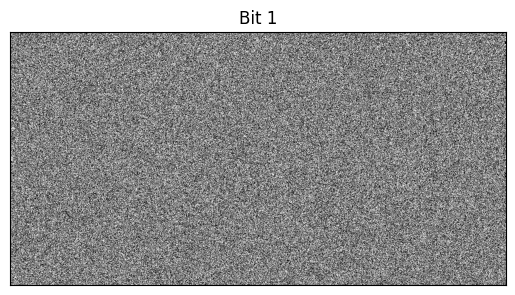

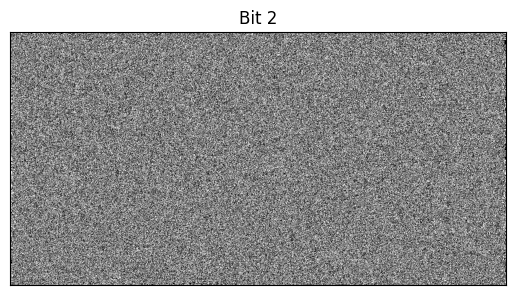

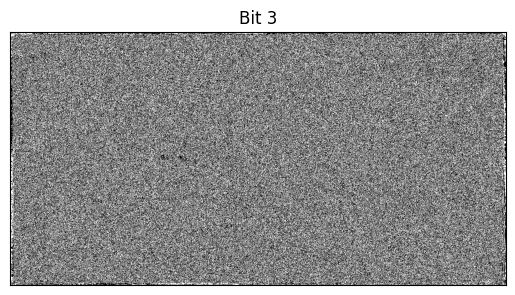

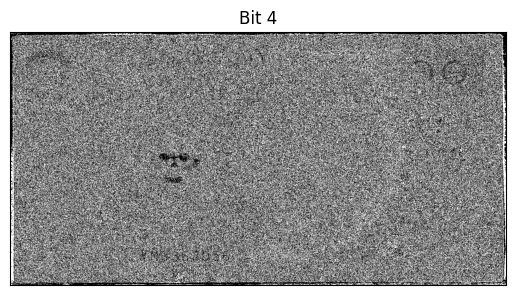

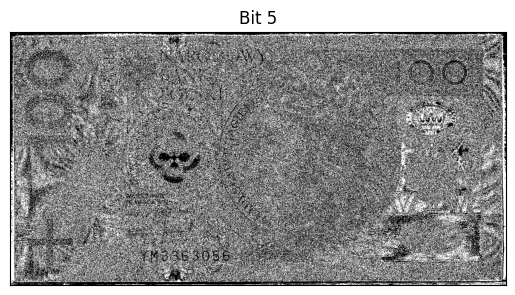

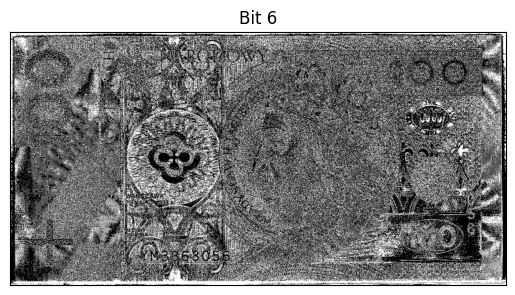

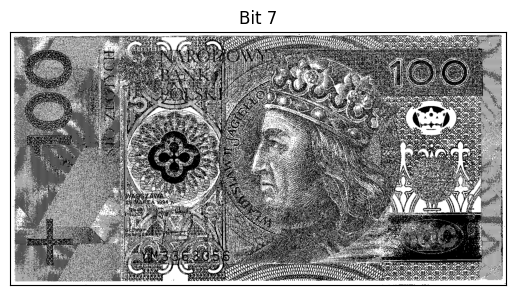

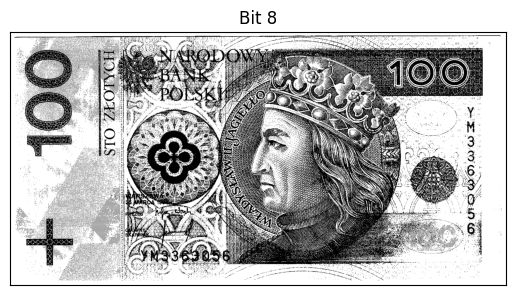

Text(0.5, 1.0, 'Bit 4 i 3')

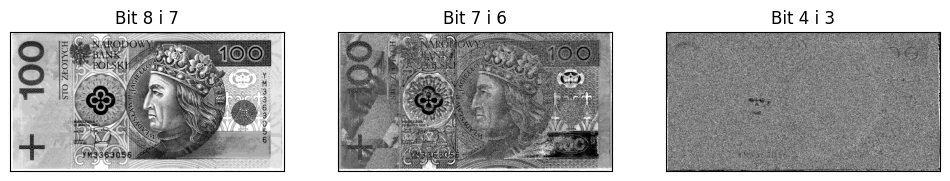

In [22]:
if not os.path.exists('100zloty.jpg'):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

zloty_brg = cv2.imread('100zloty.jpg')
zloty_rgb = cv2.cvtColor(zloty_brg, cv2.COLOR_BGR2RGB)
zloty = cv2.cvtColor(zloty_rgb, cv2.COLOR_RGB2GRAY)

bits = []
x = 1

for bit in [2 ** x for x in range(8)]:
    zero = bit * np.ones((847,1661))
    zero_8 = zero.astype('uint8')
    temp = cv2.bitwise_and(zloty, zero_8)
    bits.append(temp)
    plt.imshow(temp)
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    plt.title('Bit {}'.format(x))
    plt.show()
    x += 1

r100_1 = cv2.add(bits[7],bits[6])
r100_2 = cv2.add(bits[6],bits[5])
r100_3 = cv2.add(bits[3],bits[2])

fig, (r1, r2, r3) = plt.subplots(1,3, figsize=(12,4))
r1.imshow(r100_1)
r2.imshow(r100_2)
r3.imshow(r100_3)
r1.set(xticks=[], yticks=[])
r2.set(xticks=[], yticks=[])
r3.set(xticks=[], yticks=[])
r1.set_title('Bit 8 i 7')
r2.set_title('Bit 7 i 6')
r3.set_title('Bit 4 i 3')